In [49]:
import csv
import os
import numpy as np
import librosa
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import tensorflow as tf
import matplotlib.pyplot as plt
from pywt import wavedec

In [50]:
csv_uri = '../Preprocessing/test/db1/data_MfccDwtChromaCqtdb1L1.csv'
df = pd.read_csv(csv_uri)
df

,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,../data/DWT_NEW/MVP/New_MVP_062.wav,-378.466705,70.777046,-15.043975,-10.483999,-7.787292,-10.019837,-10.438225,-10.765308,-11.529624,...,0.004576,0.007013,0.009191,0.009871,0.007580,0.004856,0.004364,0.004430,0.003150,MVP
1,../data/DWT_NEW/MVP/New_MVP_109.wav,-319.873901,86.987167,-4.425532,-24.986303,-16.058350,-17.620874,-21.183941,-13.546381,-13.906720,...,0.006113,0.007374,0.003911,0.004396,0.006237,0.002841,0.003259,0.001627,0.001817,MVP
2,../data/DWT_NEW/MVP/New_MVP_009.wav,-436.392487,96.536903,15.220769,-3.666383,-7.341067,-16.075756,-19.296213,-12.426279,-12.215953,...,0.001060,0.001288,0.002036,0.002741,0.003057,0.002324,0.001372,0.001019,0.001093,MVP
3,../data/DWT_NEW/MVP/New_MVP_177.wav,-260.900574,82.395615,-14.294676,-40.442722,-28.068470,-14.434702,-11.098033,-15.608220,-18.183039,...,0.040846,0.037475,0.030191,0.031350,0.024266,0.023387,0.018028,0.016594,0.014518,MVP
4,../data/DWT_NEW/MVP/New_MVP_069.wav,-437.852600,95.676224,9.383162,-12.113409,-9.554273,-10.383272,-10.062037,-8.767884,-12.414495,...,0.002557,0.003386,0.003017,0.003608,0.003812,0.002936,0.002787,0.003399,0.002704,MVP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,../data/DWT_NEW/AS/New_AS_171.wav,-339.158112,40.213173,-36.526974,-53.637939,-18.601725,-12.249957,-10.941161,-9.111422,-10.798549,...,0.040663,0.033821,0.044480,0.047381,0.049833,0.045619,0.043067,0.030173,0.025898,AS
896,../data/DWT_NEW/AS/New_AS_067.wav,-501.082001,89.517166,25.677994,-4.297906,-10.959665,-17.939556,-20.772755,-15.514157,-15.844445,...,0.003850,0.002997,0.001923,0.001676,0.001316,0.000971,0.000981,0.001023,0.000886,AS
897,../data/DWT_NEW/AS/New_AS_174.wav,-307.757050,51.899139,-23.147026,-28.208418,-22.437355,-13.074753,-12.573600,-9.405491,-10.770848,...,0.027149,0.027509,0.045420,0.052697,0.049330,0.044515,0.036902,0.025493,0.022228,AS
898,../data/DWT_NEW/AS/New_AS_189.wav,-334.683624,87.311577,6.389525,-1.465219,-13.921110,-18.471697,-14.806891,-16.474894,-18.158365,...,0.009755,0.009753,0.007868,0.007349,0.005529,0.002896,0.002681,0.003235,0.002716,AS


In [51]:
# scaler = StandardScaler()
X = df.drop(['label', 'filename'], axis=1)
y = df.iloc[:, -1]

In [52]:
X

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,cqt51,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60
0,-378.466705,70.777046,-15.043975,-10.483999,-7.787292,-10.019837,-10.438225,-10.765308,-11.529624,-6.286917,...,0.003381,0.004576,0.007013,0.009191,0.009871,0.007580,0.004856,0.004364,0.004430,0.003150
1,-319.873901,86.987167,-4.425532,-24.986303,-16.058350,-17.620874,-21.183941,-13.546381,-13.906720,-13.717781,...,0.007207,0.006113,0.007374,0.003911,0.004396,0.006237,0.002841,0.003259,0.001627,0.001817
2,-436.392487,96.536903,15.220769,-3.666383,-7.341067,-16.075756,-19.296213,-12.426279,-12.215953,-12.313032,...,0.001414,0.001060,0.001288,0.002036,0.002741,0.003057,0.002324,0.001372,0.001019,0.001093
3,-260.900574,82.395615,-14.294676,-40.442722,-28.068470,-14.434702,-11.098033,-15.608220,-18.183039,-11.157784,...,0.043850,0.040846,0.037475,0.030191,0.031350,0.024266,0.023387,0.018028,0.016594,0.014518
4,-437.852600,95.676224,9.383162,-12.113409,-9.554273,-10.383272,-10.062037,-8.767884,-12.414495,-6.307548,...,0.002647,0.002557,0.003386,0.003017,0.003608,0.003812,0.002936,0.002787,0.003399,0.002704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,-339.158112,40.213173,-36.526974,-53.637939,-18.601725,-12.249957,-10.941161,-9.111422,-10.798549,-5.611834,...,0.035250,0.040663,0.033821,0.044480,0.047381,0.049833,0.045619,0.043067,0.030173,0.025898
896,-501.082001,89.517166,25.677994,-4.297906,-10.959665,-17.939556,-20.772755,-15.514157,-15.844445,-12.956374,...,0.005172,0.003850,0.002997,0.001923,0.001676,0.001316,0.000971,0.000981,0.001023,0.000886
897,-307.757050,51.899139,-23.147026,-28.208418,-22.437355,-13.074753,-12.573600,-9.405491,-10.770848,-8.731351,...,0.032781,0.027149,0.027509,0.045420,0.052697,0.049330,0.044515,0.036902,0.025493,0.022228
898,-334.683624,87.311577,6.389525,-1.465219,-13.921110,-18.471697,-14.806891,-16.474894,-18.158365,-17.774797,...,0.008435,0.009755,0.009753,0.007868,0.007349,0.005529,0.002896,0.002681,0.003235,0.002716


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
lb = LabelEncoder()
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
print(y_test.shape)
y_test = tf.keras.utils.to_categorical(lb.fit_transform(y_test))
y_train = tf.keras.utils.to_categorical(lb.fit_transform(y_train))
print(X_train.shape)
print(X_test.shape)

(180,)
(720, 112, 1)
(180, 112, 1)


In [55]:
X_train.shape[2], y.shape

(1, (900,))

In [56]:
# X_train, y_train = X[:1000], y[:1000]
# X_test, y_test = X[1000:], y[1000:]

In [57]:
# LSTM tensorflow
model = tf.keras.Sequential([
    # tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True),
    # tf.keras.layers.Dense(32,activation='relu'),

    # tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(64, activation='relu'),
    # tf.keras.layers.Dense(32, activation='relu'),

    # tf.keras.layers.Dense(5, activation='softmax')
    tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True),
    tf.keras.layers.Dense(32,activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-4)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-4)),
    tf.keras.layers.Dense(32, activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-4)),


    tf.keras.layers.Dense(5, activation='softmax')
])

optimazer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimazer, loss='categorical_crossentropy', metrics=['acc'])

# history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/50
45/45 [==============================] - 5s 46ms/step - loss: 1.5145 - acc: 0.4944 - val_loss: 1.4241 - val_acc: 0.7000
Epoch 2/50
45/45 [==============================] - 2s 36ms/step - loss: 1.3136 - acc: 0.6792 - val_loss: 1.1755 - val_acc: 0.7889
Epoch 3/50
45/45 [==============================] - 1s 33ms/step - loss: 1.0601 - acc: 0.7819 - val_loss: 0.9251 - val_acc: 0.8056
Epoch 4/50
45/45 [==============================] - 1s 32ms/step - loss: 0.8539 - acc: 0.7944 - val_loss: 0.7444 - val_acc: 0.8056
Epoch 5/50
45/45 [==============================] - 1s 32ms/step - loss: 0.7130 - acc: 0.8306 - val_loss: 0.6200 - val_acc: 0.8556
Epoch 6/50
45/45 [==============================] - 1s 33ms/step - loss: 0.6148 - acc: 0.8417 - val_loss: 0.5470 - val_acc: 0.8722
Epoch 7/50
45/45 [==============================] - 2s 36ms/step - loss: 0.5443 - acc: 0.8625 - val_loss: 0.5202 - val_acc: 0.8778
Epoch 8/50
45/45 [==============================] - 2s 34ms/step - loss: 0.5062 - a

In [58]:
# model.save('../modelh5/model_lstm_nontuning.h5')

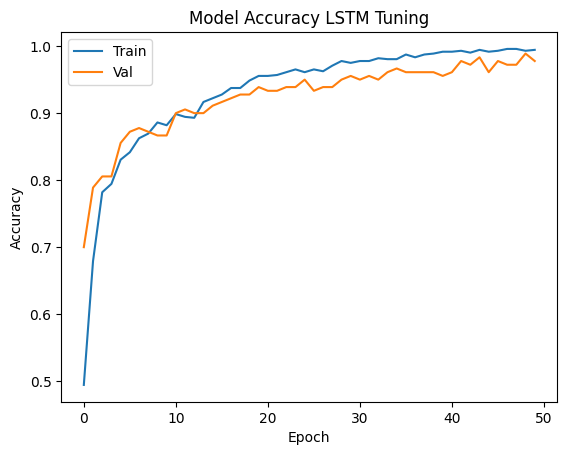

In [59]:
# plot
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy LSTM Tuning')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


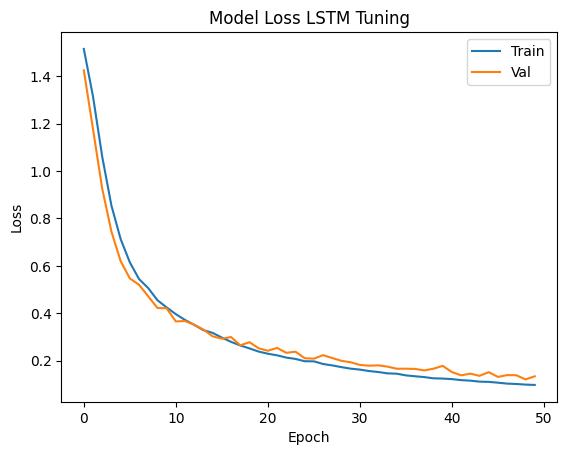

In [60]:
# loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss LSTM Tuning')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


In [61]:
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

6/6 [==============================] - 0s 12ms/step - loss: 0.1343 - acc: 0.9778
Accuracy on test set is: 0.9777777791023254


In [62]:
X_test

array([[[-4.09322021e+02],
        [ 9.29311066e+01],
        [ 2.99934998e+01],
        ...,
        [ 7.81387615e-04],
        [ 6.07485592e-04],
        [ 5.12301456e-04]],

       [[-3.38748047e+02],
        [ 8.64199753e+01],
        [-4.67710495e+00],
        ...,
        [ 4.36755782e-03],
        [ 5.37504954e-03],
        [ 4.70581977e-03]],

       [[-4.41399689e+02],
        [ 1.01357124e+02],
        [ 4.54689255e+01],
        ...,
        [ 9.80828539e-04],
        [ 7.74331915e-04],
        [ 8.60290369e-04]],

       ...,

       [[-3.97370148e+02],
        [ 6.93135452e+01],
        [ 3.75740600e+00],
        ...,
        [ 5.42564271e-03],
        [ 3.96066206e-03],
        [ 4.91650915e-03]],

       [[-3.64638702e+02],
        [ 6.76277008e+01],
        [-1.83765335e+01],
        ...,
        [ 3.47357872e-03],
        [ 4.43596626e-03],
        [ 5.75952465e-03]],

       [[-3.79689911e+02],
        [ 6.97940750e+01],
        [-2.08189678e+01],
        ...,
        

In [63]:
model.predict(X_test)

6/6 [==============================] - 1s 12ms/step


array([[4.21464792e-04, 4.97148780e-04, 1.12841090e-05, 9.98508096e-01,
        5.62076049e-04],
       [9.82172966e-01, 6.71694428e-03, 8.41028057e-04, 1.01851253e-02,
        8.37769549e-05],
       [4.76545608e-03, 2.91947811e-03, 9.89689052e-01, 2.42713979e-03,
        1.98910915e-04],
       [3.34249675e-01, 4.43623602e-01, 2.19711944e-01, 2.35682540e-03,
        5.78556137e-05],
       [3.59775368e-05, 2.90005933e-04, 5.31742990e-05, 9.98662591e-01,
        9.58225108e-04],
       [9.86021876e-01, 4.65116091e-03, 7.14956410e-03, 2.15909979e-03,
        1.82417789e-05],
       [1.37548834e-01, 1.93602927e-02, 4.81999964e-01, 8.47080275e-02,
        2.76382774e-01],
       [3.36313341e-03, 1.61364756e-03, 3.74429747e-02, 8.94356132e-01,
        6.32240027e-02],
       [3.20722326e-03, 7.86961056e-03, 4.18300351e-06, 9.88879859e-01,
        3.90589375e-05],
       [1.89381861e-03, 3.46715009e-04, 4.34024732e-05, 9.97461855e-01,
        2.54143495e-04],
       [7.32341199e-04, 7.6654

In [64]:

# confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
y_pred = model.predict(X_test)
y_p = np.argmax(y_pred, axis=1)
y_t = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_t, y_p)
cm

6/6 [==============================] - 0s 15ms/step


array([[35,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0],
       [ 0,  3, 34,  0,  1],
       [ 0,  0,  0, 35,  0],
       [ 0,  0,  0,  0, 41]])

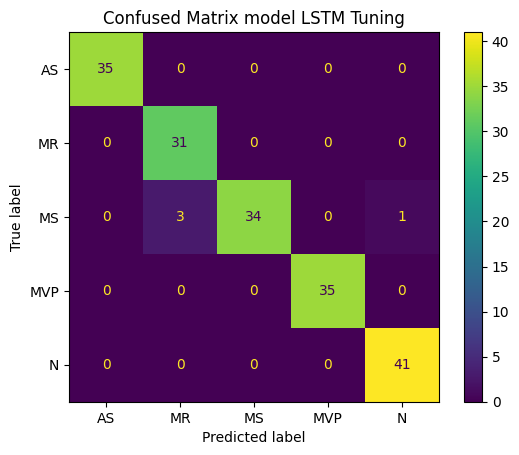

In [65]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['AS', 'MR', 'MS', 'MVP', 'N'])
disp.plot()
plt.title('Confused Matrix model LSTM Tuning')
plt.show()

In [66]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [67]:
print("Sensitivity :" , TPR, 'mean: ', np.mean(TPR))
print("Specificity :" , TNR, 'mean: ', np.mean(TNR))
print("Precision :" , PPV, 'mean: ', np.mean(PPV))
print("Accuracy :" , ACC, 'mean: ', np.mean(ACC))
print("FPR :" , FPR, 'mean: ', np.mean(FPR))
print("FNR :" , FNR, 'mean: ', np.mean(FNR))
print("NPV :" , NPV, 'mean: ', np.mean(NPV))
print("FDR :" , FDR, 'mean: ', np.mean(FDR))
print("f1_score:", 2 * (PPV * TPR) / (PPV + TPR), 'mean: ', np.mean(2 * (PPV * TPR) / (PPV + TPR)))

Sensitivity : [1.         1.         0.89473684 1.         1.        ] mean:  0.9789473684210528
Specificity : [1.         0.97986577 1.         1.         0.99280576] mean:  0.9945343054415527
Precision : [1.         0.91176471 1.         1.         0.97619048] mean:  0.9775910364145657
Accuracy : [1.         0.98333333 0.97777778 1.         0.99444444] mean:  0.9911111111111112
FPR : [0.         0.02013423 0.         0.         0.00719424] mean:  0.005465694558447202
FNR : [0.         0.         0.10526316 0.         0.        ] mean:  0.021052631578947368
NPV : [1.         1.         0.97260274 1.         1.        ] mean:  0.9945205479452055
FDR : [0.         0.08823529 0.         0.         0.02380952] mean:  0.022408963585434174
f1_score: [1.         0.95384615 0.94444444 1.         0.98795181] mean:  0.9772484811039028


In [68]:
# classification_report
from sklearn.metrics import classification_report

print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.91      1.00      0.95        31
           2       1.00      0.89      0.94        38
           3       1.00      1.00      1.00        35
           4       0.98      1.00      0.99        41

    accuracy                           0.98       180
   macro avg       0.98      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180



In [69]:
# save h5
model_uri = '../modelh5/model_lstm_tuning.h5'
model.save(model_uri)

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [70]:
new_model = tf.keras.models.load_model(model_uri)
new_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 112, 64)           16896     
                                                                 
 dense_8 (Dense)             (None, 112, 32)           2080      
                                                                 
 flatten_2 (Flatten)         (None, 3584)              0         
                                                                 
 dense_9 (Dense)             (None, 64)                229440    
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 5)                 165       
                                                                 
Total params: 250661 (979.14 KB)
Trainable params: 250

In [71]:
import wave
import csv
import json
import librosa
header = 'filename'
for i in range(1, 41):
    header += f' mfcc{i}'
for i in range(1, 13):
  header += f' chroma{i}'
for i in range(1, 61):
  header += f' cqt{i}'
header += ' label'
header = header.split()

test_uri = "test.csv"

def extract_mfcc(audiofile):
    file = open(test_uri, 'w', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(header)
    y, sr = librosa.load(audiofile, mono=True, duration=3, sr=8000)
    coeffs = wavedec(y, 'db1', level=10)
    cA,cD10,cD9,cD8,cD7,cD6,cD5,cD4,cD3,cD2, cD1 = coeffs
    mfcc = librosa.feature.mfcc(y=cD1, sr=sr, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
    rms = librosa.feature.chroma_stft(y=cD1, sr=8000)
    cqt = np.abs(librosa.cqt(y=cD1, sr=sr, n_bins=60)) 
    combined_features = np.concatenate((mfcc, rms, cqt), axis=0)
    to_append = f'Signal'
    for e in combined_features:
        to_append += f' {np.mean(e.T, axis=0)}'
    file = open('test.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

def predictCoba(audio):
    model = tf.keras.models.load_model(model_uri)
    extract_mfcc(audio)
    data = pd.read_csv(test_uri)
    df = data.drop(['label', 'filename'], axis=1)
    pred = model.predict(df)
    class_labels = ['AS', 'MR', 'MS', 'MVP', 'N']
    cek = np.argmax(pred[0])
    print(pred[0])
    print(cek)
    print(f'Predicted class: {class_labels[cek]}')


predictCoba('../data/training/N/New_N_105.wav')

1/1 [==============================] - 1s 552ms/step
[1.7538089e-03 1.1159200e-04 1.8372196e-04 9.0608830e-03 9.8888993e-01]
4
Predicted class: N


In [72]:
data = pd.read_csv('test.csv')
data

,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,Signal,-455.038177,73.755302,10.247844,2.670123,-0.482979,-11.29778,-13.337904,-10.518919,-8.008946,...,0.001555,0.001038,0.001262,0.001623,0.001386,0.00131,0.001196,0.000847,0.000822,NaN
